<a href="https://colab.research.google.com/github/felissia/Early-Cataract-Detection/blob/main/RM_SGD_optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!file /content/Dataset4 (2).zip

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `file /content/Dataset4 (2).zip'


In [ ]:
zip_path = "/content/Dataset5.zip"
extract_path = "/content"  # Langsung ke /content

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [ ]:
#import dataset
import zipfile
import os

dataset_path = "/content/Dataset5"

print(os.listdir(dataset_path))

['test', 'train']


# DenseNet

In [ ]:
#Import
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix



29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 37s 321ms/step - accuracy: 0.6249 - loss: 0.9940 - val_accuracy: 0.8557 - val_loss: 0.2872
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 174ms/step - accuracy: 0.9192 - loss: 0.2430 - val_accuracy: 0.9320 - val_loss: 0.1814
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - accuracy: 0.9376 - loss: 0.1883 - val_accuracy: 0.9670 - val_loss: 0.1192
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.9731 - loss: 0.1246 - val_accuracy: 0.9753 - val_loss: 0.1018
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 20s 171ms/step - accuracy: 0.9711 - loss: 0.0994 - val_accuracy: 0.9856 - val_loss: 0.0726
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 180ms/step - accuracy: 0.9823 - loss: 0.0873 - val_accuracy: 0.9897 - val_loss: 0.0683
Epoch 7/10
61/61 ━━━━━━━━━━━━━

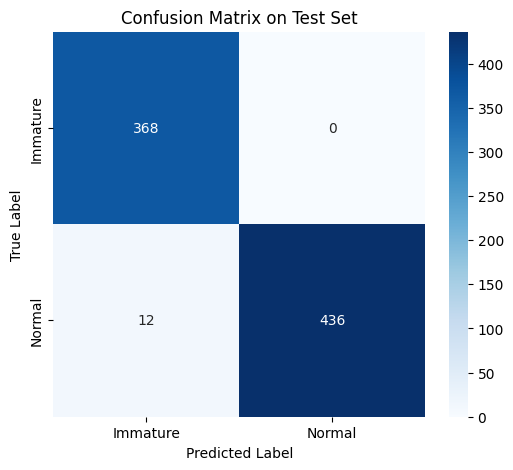

In [ ]:
#DenseNet
base_model1 = DenseNet121(
    weights = 'imagenet',
    include_top = False,
    input_shape=(224, 224, 3)
)

base_model1.trainable = False

train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

#setup model
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

normalization_layer = layers.Rescaling(1./255)

base_model1 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model1.trainable = False

model = Sequential([
    data_augmentation,
    normalization_layer,
    base_model1,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(2, activation='softmax')
])

#Train model
model.compile(
       optimizer='sgd',  # Use SGD optimizer
       loss='categorical_crossentropy',
       metrics=['accuracy']
   )

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

test_dataset = image_dataset_from_directory(
    '/content/Dataset5/test',
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical',
    shuffle=False
)

class_names = test_dataset.class_names
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

In [ ]:
temp_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset5",
    image_size=(224, 224),
    batch_size = 1
)

class_names = temp_dataset.class_names
print("Class names: ", class_names)

Found 3245 files belonging to 2 classes.
Class names:  ['test', 'train']


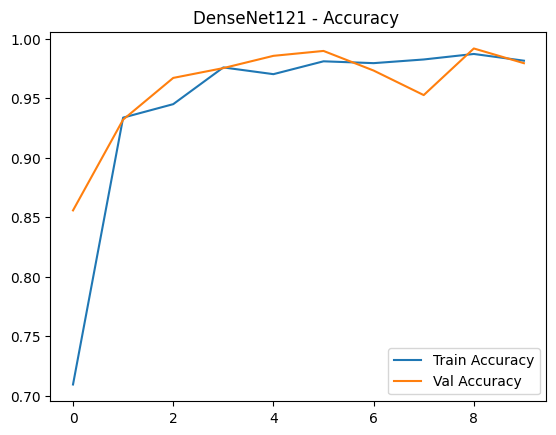

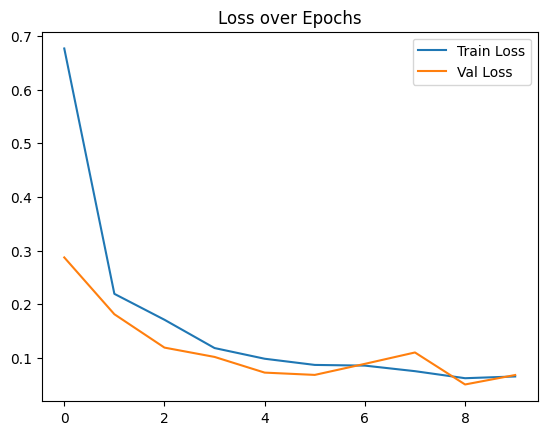

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('DenseNet121 - Accuracy ')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()

# ResNet

In [ ]:
import tensorflow as tf

# Cek semua device yang tersedia
print("Devices available:")
print(tf.config.list_physical_devices())

# Cek hanya GPU
print("\nGPU available:")
print(tf.config.list_physical_devices('GPU'))

import tensorflow as tf

print("🚀 Using TensorFlow version:", tf.__version__)
print("🖥️ Available GPU devices:")
print(tf.config.list_physical_devices('GPU'))

# Menampilkan device tempat layer ditempatkan
from tensorflow.python.client import device_lib
print("\n📊 Device placement log:")
print(device_lib.list_local_devices())


Devices available:
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

GPU available:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
🚀 Using TensorFlow version: 2.18.0
🖥️ Available GPU devices:
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

📊 Device placement log:
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16133497117000803817
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16476022906089443652
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
Found 816 files belonging to 2 classes.
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.4786 - loss: 1.1228

61/61 ━━━━━━━━━━━━━━━━━━━━ 51s 642ms/step - accuracy: 0.4788 - loss: 1.1191 - val_accuracy: 0.4557 - val_loss: 0.7825 - learning_rate: 0.0100
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.5001 - loss: 0.7154 - val_accuracy: 0.4557 - val_loss: 0.7967 - learning_rate: 0.0100
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.4609 - loss: 0.7182

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - accuracy: 0.4612 - loss: 0.7180 - val_accuracy: 0.4557 - val_loss: 0.7121 - learning_rate: 0.0100
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5028 - loss: 0.7001

61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 455ms/step - accuracy: 0.5026 - loss: 0.7001 - val_accuracy: 0.4557 - val_loss: 0.7079 - learning_rate: 0.0100
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5073 - loss: 0.6921

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.5075 - loss: 0.6922 - val_accuracy: 0.5443 - val_loss: 0.6890 - learning_rate: 0.0100
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 470ms/step - accuracy: 0.5002 - loss: 0.6984 - val_accuracy: 0.4557 - val_loss: 0.6964 - learning_rate: 0.0100
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.5128 - loss: 0.6942

61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 456ms/step - accuracy: 0.5127 - loss: 0.6942 - val_accuracy: 0.5443 - val_loss: 0.6880 - learning_rate: 0.0100
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 451ms/step - accuracy: 0.4976 - loss: 0.6958 - val_accuracy: 0.4557 - val_loss: 0.6957 - learning_rate: 0.0100
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 450ms/step - accuracy: 0.5155 - loss: 0.6948 - val_accuracy: 0.4722 - val_loss: 0.6933 - learning_rate: 0.0100
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 453ms/step - accuracy: 0.4947 - loss: 0.6954 - val_accuracy: 0.4557 - val_loss: 0.7046 - learning_rate: 0.0100
Epoch 1/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 58s 629ms/step - accuracy: 0.5078 - loss: 0.7000 - val_accuracy: 0.5505 - val_loss: 0.6905 - learning_rate: 1.0000e-06
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 63s 464ms/step - accuracy: 0.6130 - loss: 0.6544 - val_accuracy: 0.4619 - val_loss: 0.7045 - learning_rate: 1.0000e-06
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 452ms/step - accuracy: 0.6760 - loss: 0.61

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 476ms/step - accuracy: 0.6891 - loss: 0.5898 - val_accuracy: 0.6041 - val_loss: 0.6695 - learning_rate: 1.0000e-06
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.7384 - loss: 0.5501

61/61 ━━━━━━━━━━━━━━━━━━━━ 40s 470ms/step - accuracy: 0.7384 - loss: 0.5501 - val_accuracy: 0.6990 - val_loss: 0.6241 - learning_rate: 1.0000e-06
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.7460 - loss: 0.5169

61/61 ━━━━━━━━━━━━━━━━━━━━ 42s 484ms/step - accuracy: 0.7460 - loss: 0.5169 - val_accuracy: 0.6990 - val_loss: 0.5716 - learning_rate: 1.0000e-06
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.7864 - loss: 0.4865

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 477ms/step - accuracy: 0.7864 - loss: 0.4864 - val_accuracy: 0.7773 - val_loss: 0.5076 - learning_rate: 1.0000e-06
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.8025 - loss: 0.4555

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 472ms/step - accuracy: 0.8026 - loss: 0.4554 - val_accuracy: 0.8227 - val_loss: 0.4593 - learning_rate: 1.0000e-06
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.8236 - loss: 0.4244

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 468ms/step - accuracy: 0.8236 - loss: 0.4245 - val_accuracy: 0.8289 - val_loss: 0.4285 - learning_rate: 1.0000e-06
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.8236 - loss: 0.4170

61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 491ms/step - accuracy: 0.8238 - loss: 0.4169 - val_accuracy: 0.8392 - val_loss: 0.3983 - learning_rate: 1.0000e-06
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8464 - loss: 0.3771

61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 484ms/step - accuracy: 0.8464 - loss: 0.3771 - val_accuracy: 0.8619 - val_loss: 0.3695 - learning_rate: 1.0000e-06
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.8665 - loss: 0.3660

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 481ms/step - accuracy: 0.8666 - loss: 0.3659 - val_accuracy: 0.8598 - val_loss: 0.3505 - learning_rate: 1.0000e-06
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step - accuracy: 0.8771 - loss: 0.3406

61/61 ━━━━━━━━━━━━━━━━━━━━ 30s 485ms/step - accuracy: 0.8772 - loss: 0.3404 - val_accuracy: 0.8680 - val_loss: 0.3278 - learning_rate: 1.0000e-06
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.8930 - loss: 0.3041

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 483ms/step - accuracy: 0.8930 - loss: 0.3042 - val_accuracy: 0.8784 - val_loss: 0.3137 - learning_rate: 1.0000e-06
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.9074 - loss: 0.2847

61/61 ━━━━━━━━━━━━━━━━━━━━ 44s 535ms/step - accuracy: 0.9074 - loss: 0.2847 - val_accuracy: 0.8804 - val_loss: 0.2912 - learning_rate: 1.0000e-06
Epoch 16/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9040 - loss: 0.2794

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 473ms/step - accuracy: 0.9041 - loss: 0.2792 - val_accuracy: 0.8825 - val_loss: 0.2786 - learning_rate: 1.0000e-06
Epoch 17/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.9322 - loss: 0.2397

61/61 ━━━━━━━━━━━━━━━━━━━━ 31s 492ms/step - accuracy: 0.9321 - loss: 0.2397 - val_accuracy: 0.8969 - val_loss: 0.2596 - learning_rate: 1.0000e-06
Epoch 18/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - accuracy: 0.9085 - loss: 0.2492

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 468ms/step - accuracy: 0.9088 - loss: 0.2490 - val_accuracy: 0.8969 - val_loss: 0.2514 - learning_rate: 1.0000e-06
Epoch 19/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.9287 - loss: 0.2177

61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 471ms/step - accuracy: 0.9289 - loss: 0.2176 - val_accuracy: 0.8948 - val_loss: 0.2450 - learning_rate: 1.0000e-06
Epoch 20/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.9523 - loss: 0.1946

61/61 ━━━━━━━━━━━━━━━━━━━━ 41s 473ms/step - accuracy: 0.9523 - loss: 0.1945 - val_accuracy: 0.9113 - val_loss: 0.2234 - learning_rate: 1.0000e-06
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

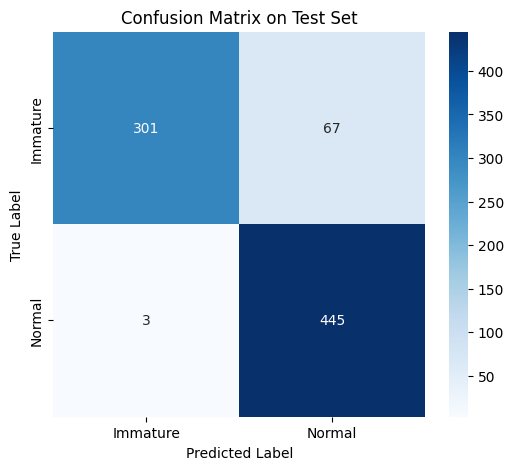

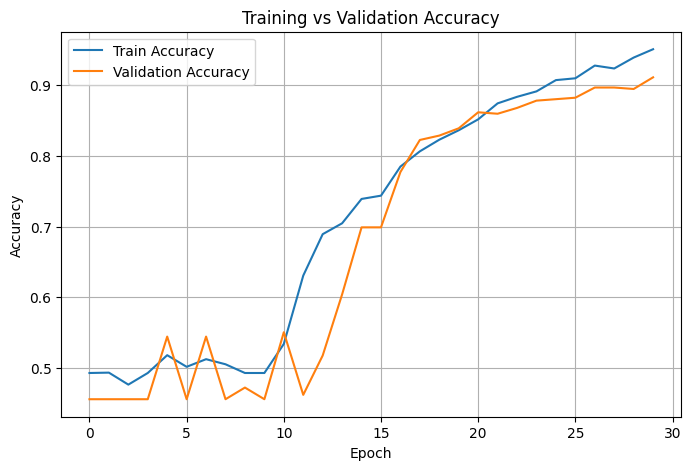

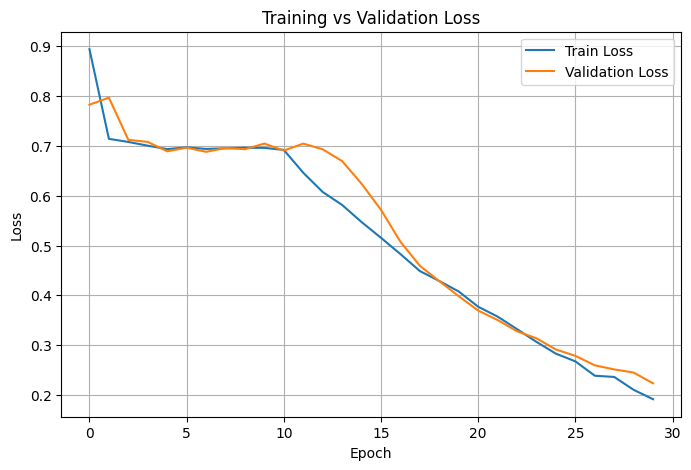

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Paths
train_dir = '/content/Dataset5/train'
test_dir = '/content/Dataset5/test'

# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
SEED = 123

# Load dataset
raw_train_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

raw_val_ds = image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

test_ds = image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical',
    shuffle=False
)

# Simpan class names
class_names = raw_train_ds.class_names

# Normalisasi val dan test (tanpa augmentasi)
val_ds = raw_val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Hitung class weights
y_labels = []
for _, labels in raw_train_ds:
    y_labels.extend(np.argmax(labels.numpy(), axis=1))
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_labels), y=y_labels)
class_weight_dict = dict(enumerate(class_weights))

# Augmentasi hanya untuk training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1),
])

# Final train dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x), y))
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y)).prefetch(buffer_size=tf.data.AUTOTUNE)

# Base Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

# Full Model
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax')
])

# Compile awal
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
checkpoint = tf.keras.callbacks.ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Training awal
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-30]:  # Hanya buka 30 layer terakhir
    layer.trainable = False

# Compile ulang dengan learning rate kecil
model.compile(optimizer=tf.keras.optimizers.SGD(1e-6), loss='categorical_crossentropy', metrics=['accuracy'])

# Training fine-tune
history_finetune = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    class_weight=class_weight_dict,
    callbacks=[early_stop, reduce_lr, checkpoint]
)

# Evaluasi
y_true = []
y_pred = []
for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print("📋 Classification Report on Test Set:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Accuracy Plot
train_acc = history.history['accuracy'] + history_finetune.history['accuracy']
val_acc = history.history['val_accuracy'] + history_finetune.history['val_accuracy']

plt.figure(figsize=(8, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Plot
train_loss = history.history['loss'] + history_finetune.history['loss']
val_loss = history.history['val_loss'] + history_finetune.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2, EfficientNetB0
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as mobilenet_preprocess
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess
import numpy as np
import matplotlib.pyplot as plt

# --- Load Dataset ---
train_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = image_dataset_from_directory(
    '/content/Dataset5/train',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

# --- Augmentasi dan Prefetching ---
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# --- Fungsi Build Model ---
def build_model(base_model, preprocess_func):
    base_model.trainable = False  # freeze feature extractor
    model = models.Sequential([
        data_augmentation,
        layers.Lambda(preprocess_func),
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(2, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- Train MobileNetV2 ---
mobilenet_base = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
mobilenet_model = build_model(mobilenet_base, mobilenet_preprocess)

print("\nTraining MobileNetV2...")
mobilenet_history = mobilenet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)

# --- Train EfficientNetB0 ---
efficientnet_base = EfficientNetB0(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
efficientnet_model = build_model(efficientnet_base, efficientnet_preprocess)

print("\nTraining EfficientNetB0...")
efficientnet_history = efficientnet_model.fit(train_dataset, validation_data=val_dataset, epochs=10)


Found 2429 files belonging to 2 classes.
Using 1944 files for training.
Found 2429 files belonging to 2 classes.
Using 485 files for validation.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training MobileNetV2...
Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.6752 - loss: 0.6901 - val_accuracy: 0.8804 - val_loss: 0.3009
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.8609 - loss: 0.3225 - val_accuracy: 0.9464 - val_loss: 0.2119
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9324 - loss: 0.2009 - val_accuracy: 0.9588 - val_loss: 0.1419
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9278 - loss: 0.1773 - val_accuracy: 0.9753 - val_loss: 0.1242
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.9504 - loss: 0.1438 - val_accuracy: 0.9794 - val_loss: 0.0977
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.9613 - loss: 0.1288 - val_accuracy: 0.9649 - val_loss: 0.0983
Epoch 7/10
61/61 

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Classification Report:
               precision    recall  f1-score   support

    Immature       0.97      0.99      0.98       221
      Normal       0.99      0.97      0.98       264

    accuracy                           0.98       485
   macro avg       0.98      0.98      0.98       485
weighted avg       0.98      0.98      0.98       485

Confusion Matrix:
 [[219   2]
 [  7

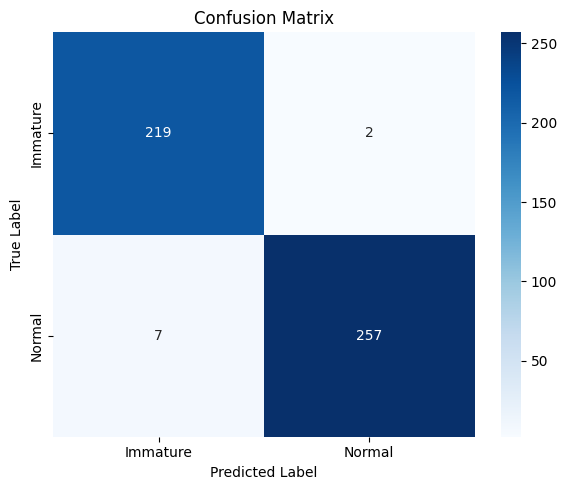

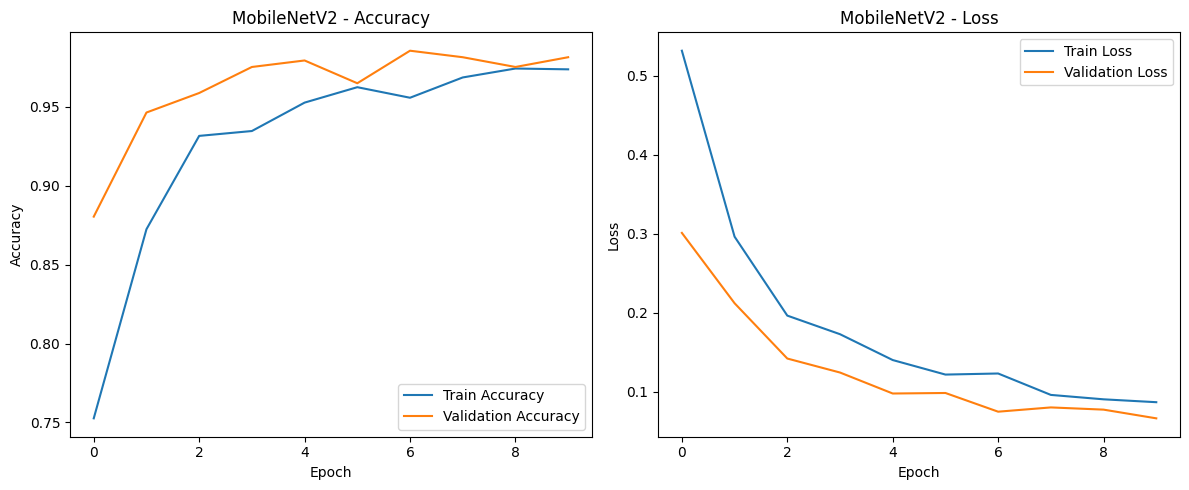

In [ ]:
# Gunakan salah satu model (contoh MobileNetV2)
model = mobilenet_model  # Atau model lain yang kamu pakai

# ===== Buat prediksi dan ambil label =====
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))      # True label
    y_pred.extend(np.argmax(preds, axis=1))                # Predicted label

# ===== Classification Report dan Confusion Matrix =====
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)

# ===== Visualisasi Confusion Matrix =====
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# ===== Grafik Training dan Validation (jika history tersedia) =====
# Gabungkan jika kamu fine-tune
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(train_acc))

# ===== Plot Accuracy dan Loss =====
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(mobilenet_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mobilenet_history.history['loss'], label='Train Loss')
plt.plot(mobilenet_history.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Classification Report:
               precision    recall  f1-score   support

    Immature       0.99      0.98      0.98       221
      Normal       0.98      0.99      0.99       264

    accuracy                           0.99       485
   macro avg       0.99      0.99      0.99       485
weighted avg       0.99      0.99      0.99       485

Confusion Matrix:
 [[217   4]
 [  3 261]

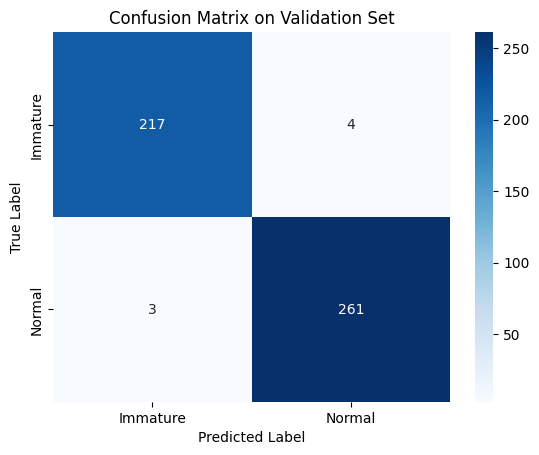

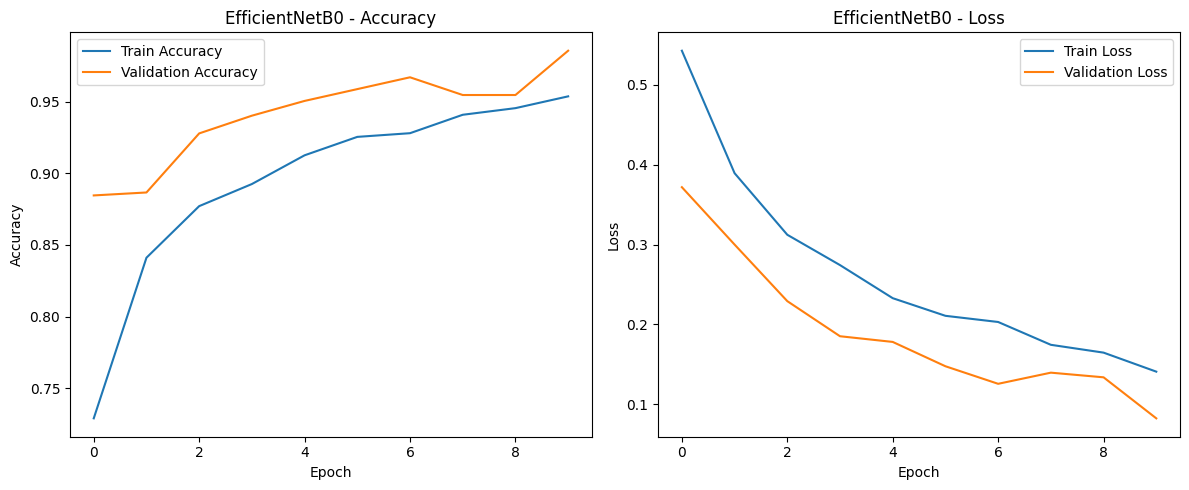

In [ ]:
#efficientnetmodel
model = efficientnet_model

# Prediksi dan label asli
y_true = []
y_pred = []
for images, labels in val_dataset:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

# Evaluasi
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Validation Set')
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(efficientnet_history.history['accuracy'], label='Train Accuracy')
plt.plot(efficientnet_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(efficientnet_history.history['loss'], label='Train Loss')
plt.plot(efficientnet_history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

